<a href="https://colab.research.google.com/github/Nikhila-220017/demo-git/blob/master/movie_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/IMDB-Movie-Data.csv')

In [4]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
df.shape

(1000, 12)

In [6]:
df.dtypes

,0
Rank,int64
Title,object
Genre,object
Description,object
Director,object
Actors,object
Year,int64
Runtime (Minutes),int64
Rating,float64
Votes,int64


In [7]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [8]:
df = df.drop(columns=['Title'])

In [10]:
threshold = len(df.columns) / 2
df = df.dropna(thresh=threshold)

In [12]:
for col in df.columns:
   if df[col].dtype in ['int64', 'float64']:
    df[col].fillna(df[col].median(), inplace=True)
   else:
      df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-392747680.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-392747680.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [13]:
df['label'] = df['Rating'].apply(lambda x: 1 if x >= 7 else 0)

In [16]:
from sklearn.preprocessing import LabelEncoder


if 'Genre' in df.columns:
    le = LabelEncoder()
    df['Genre_encoded'] = le.fit_transform(df['Genre'])


features = ['Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore', 'Genre_encoded']
X = df[features]
y = df['label']


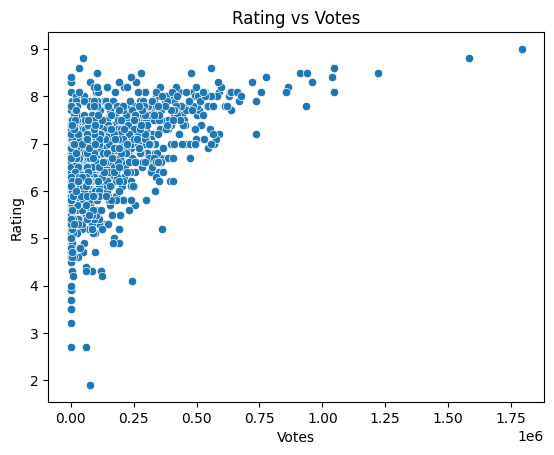

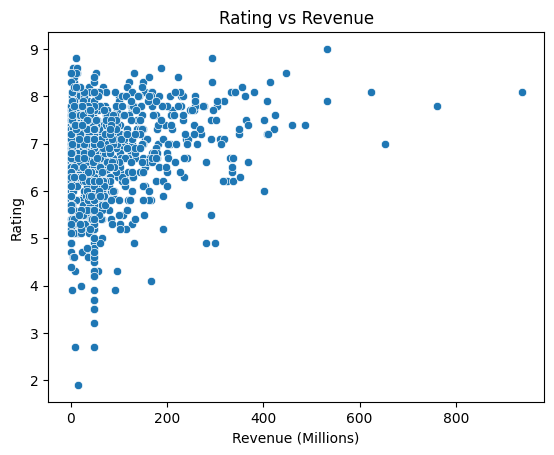

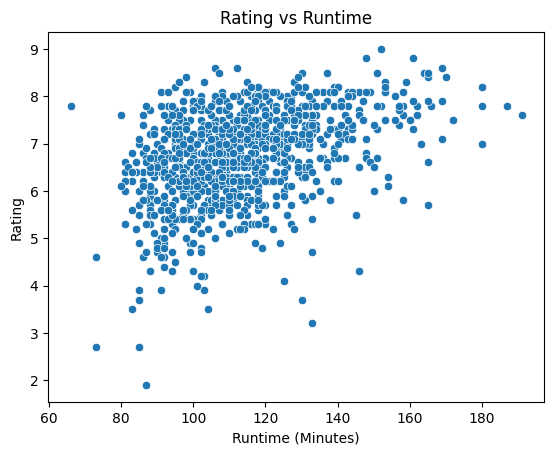

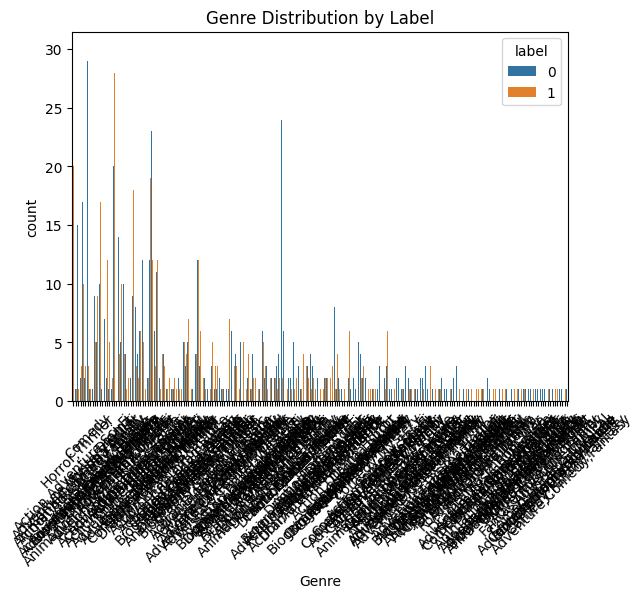

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating vs Votes
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title("Rating vs Votes")
plt.show()

# Rating vs Revenue
sns.scatterplot(x='Revenue (Millions)', y='Rating', data=df)
plt.title("Rating vs Revenue")
plt.show()

# Rating vs Runtime
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=df)
plt.title("Rating vs Runtime")
plt.show()

# Genre distribution by label
sns.countplot(x='Genre', hue='label', data=df)
plt.title("Genre Distribution by Label")
plt.xticks(rotation=45)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.815

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.81      0.76      0.79        89

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200


Confusion Matrix:
 [[95 16]
 [21 68]]
